# Homework Week 3
Jonathan P. Williams, _Introduction to the Interstellar Medium_

|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/16/2021|

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

# constants
c    = 3e8      # [m/s]
h    = 6.63e-34 # [Js]
k    = 1.38e-23 # [J/K]
pc   = 3.09e16  # [m]
Msun = 1.99e30  # [kg]

B = lambda nu, T: 2*h*nu**3/c**2/(np.exp(h*nu/k/T)-1) # Planck function

## Question 4.1
The Sun's absolute magnitude at V band is $M_\rm{V}(0.551\,\rm{μm}) = 4.83$.
A solar twin's apparent magnitude at the Galactic Center ($d = 8.2\,\rm{kpc}$, p. 4) is, from (4.1),
\begin{equation}
m_\textrm{V, GC} = 4.82 + 5\log_{10}\left( \frac{8.2\times10^3\,\textrm{pc}}{10\,\textrm{pc}} \right) \approx 1.94.
\end{equation}
Assuming dust extinction along the Galactic plane of $A_\textrm{V} = d(-1\,\textrm{mag kpc}^{-1}) = -8.2\,\textrm{mag}$ gives
\begin{equation}
m_\textrm{V, ext} = M + 5\log_{10}\left( \frac{d}{10\,\textrm{pc}} \right) + A \approx -6.26.
\end{equation}

At K band, $M_\rm{K}(2.22\,\rm{μm}) = 3.28$.
For a solar twin at the Galactic Center,
\begin{equation}
m_\textrm{K, GC} \approx 1.78.
\end{equation}
From (4.7), $A_\textrm{K} \approx 0.1 A_\textrm{V} = -0.82\,\textrm{mag}$, so
\begin{equation}
m_\textrm{V, ext} \approx 0.96.
\end{equation}

## Question 4.2
The map in Fig. 4.7 is $7.5' \times 7.5'$.
The Barnard 68 core's approximate angular diameter is $2.5'$.
With angular radius $\theta = 1.25' = 2.08\times10^{-2}\,\rm{deg} = 3.63\times10^{-4}\,\rm{rad}$, we estimate its angular area as

\begin{equation}
\Omega = \pi \theta^2 = 4.14\times10^{-7}\,\rm{sr}.
\tag{A}
\end{equation}

Meanwhile, using $\theta = r/d$, if $r \approx 0.1\,\rm{pc}$ from Fig. 4.7, then the distance to the source is

\begin{equation}
d = \frac{r}{\theta} \approx 8.51\times10^{18}\,\rm{m}.
\tag{B}
\end{equation}

In [2]:
theta = 3.63e-4
r = 0.1*pc
d = r/theta
print('d = {:.2e} m'.format(d))

d = 8.51e+18 m


The observable flux is

\begin{equation}
\left. F_\nu \simeq \kappa_\nu^\textrm{dust}B_\nu M_\textrm{d} \middle/ d^2 \right.,
\tag{4.17}
\end{equation}
where, for $\nu < 1200\,\textrm{GHz}$,
\begin{equation}
\kappa_\nu^\textrm{dust} = \kappa_0^\textrm{dust}\left( \frac{\nu}{\nu_0} \right)^\beta,
\tag{4.18}
\end{equation}
where $\kappa_\textrm{1 mm}^\textrm{dust} \approx 0.03\,\textrm{m}^2\,\textrm{kg}^{-1}$, at $\nu_0 = c/\lambda = 3\times10^{11}\,\rm{Hz}$, and spectral dependence $\beta \approx 1.7$ from galactic multiwavelength surveys.
Assuming the dust has a uniform temperature of $T_\rm{d} = 20\,\rm{K}$ and total mass of $M_\textrm{d} = 10^{-2}\,M_\odot$, we can plot the SED of the __graybody__ dust emission and overplot a blackbody with the same solid angle and temperature as follows.

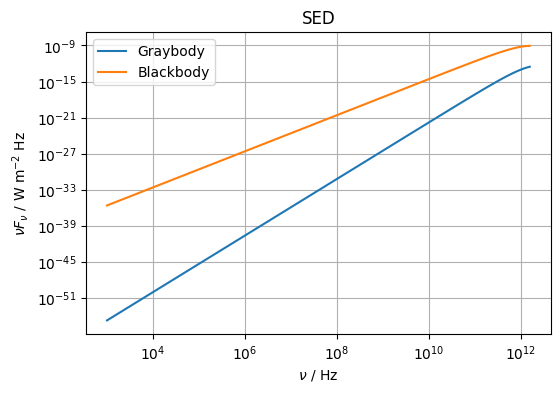

In [3]:
# constants
Omega = 4.14e-7   # [sr]
beta  = 1.7       # spectral dependence
l     = 1e-3      # [m]
nu0   = c/l       # [Hz]
Td    = 20        # [K]
Md    = 1e-2*Msun # [kg]
nus   = np.logspace(3, 12.2, 100)

kds = 0.03*(nus/nu0)**beta
F_gb = kds*B(nus, Td)*Md/d**2 # Planck function
F_bb = Omega*B(nus, Td)

fig, ax = plt.subplots(dpi=100)
ax.set(title='SED', xlabel=r'$\nu$ / Hz',
       ylabel=r'$\nu F_\nu$ / W m$^{-2}$ Hz')
ax.loglog(nus, nus*F_gb, label='Graybody')
ax.loglog(nus, nus*F_bb, label='Blackbody')
ax.legend()
ax.grid()
plt.savefig('Q4.2_SED.pdf', bbox_inches='tight')

From p. 34, the difference in SEDs can be explained by the fact that "[d]usty clouds strongly absorb ultraviolet and optical photons. Their energy is conserved and released at longer wavelengths as the absorbing dust grains are cooler than the source of emission"

## Question 4.3

### a
Per `miepython` [documentation](https://miepython.readthedocs.io/en/latest/01_basics.html#Size-Parameter-x), we define the __size parameter__ $x = 2\pi a/\lambda$.

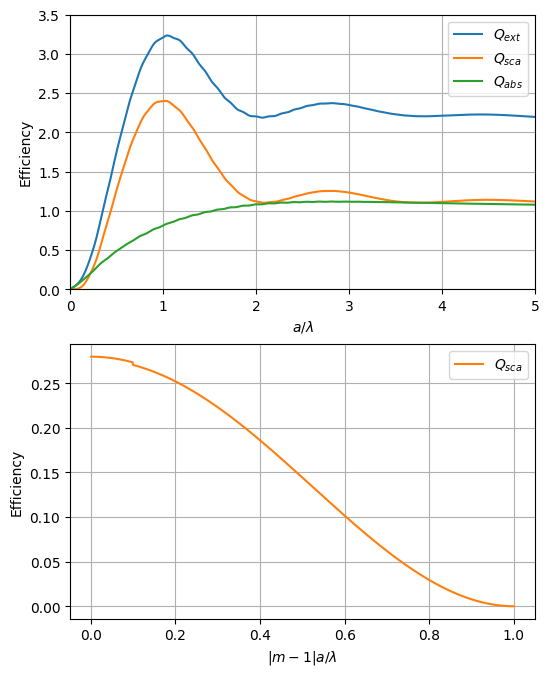

In [4]:
import miepython as mp

aoverl = np.linspace(0.01, 5.0, 1000)
x = 2*np.pi*aoverl # size parameter
m = 1.3 - 0.05j    # index of refraction
qext, qsca, qback, g = mp.mie(m, x)
qabs = qext - qsca

fig, axs = plt.subplots(2, 1, figsize=(6, 8), dpi=100)
axs[0].set(xlabel=r'$a/\lambda$', ylabel='Efficiency',
           xlim=(0, 5.0), ylim=(0, 3.5))
axs[0].plot(aoverl, qext, label='$Q_{ext}$')
axs[0].plot(aoverl, qsca, label='$Q_{sca}$')
axs[0].plot(aoverl, qabs, label='$Q_{abs}$')
axs[0].legend()
axs[0].grid()

ms = np.linspace(1e-3, 1.0, 1000)
qsca2 = mp.mie(ms, 1)[1]

axs[1].set(xlabel=r'$|m-1|a/\lambda$', ylabel='Efficiency')
axs[1].plot(ms, qsca2, color='tab:orange', label='$Q_{sca}$')
axs[1].legend()
axs[1].grid()
plt.savefig('Q4.3a.pdf', bbox_inches='tight')

### b

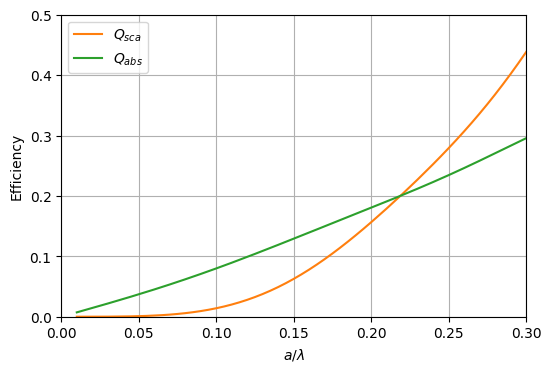

In [5]:
fig, ax = plt.subplots(dpi=100)
ax.set(xlabel=r'$a/\lambda$', ylabel='Efficiency', xlim=(0, 0.3), ylim=(0, 0.5))
ax.plot(aoverl, qsca, color='tab:orange', label='$Q_{sca}$')
ax.plot(aoverl, qabs, color='tab:green', label='$Q_{abs}$')
ax.legend()
ax.grid()
plt.savefig('Q4.3b.pdf', bbox_inches='tight')

### c

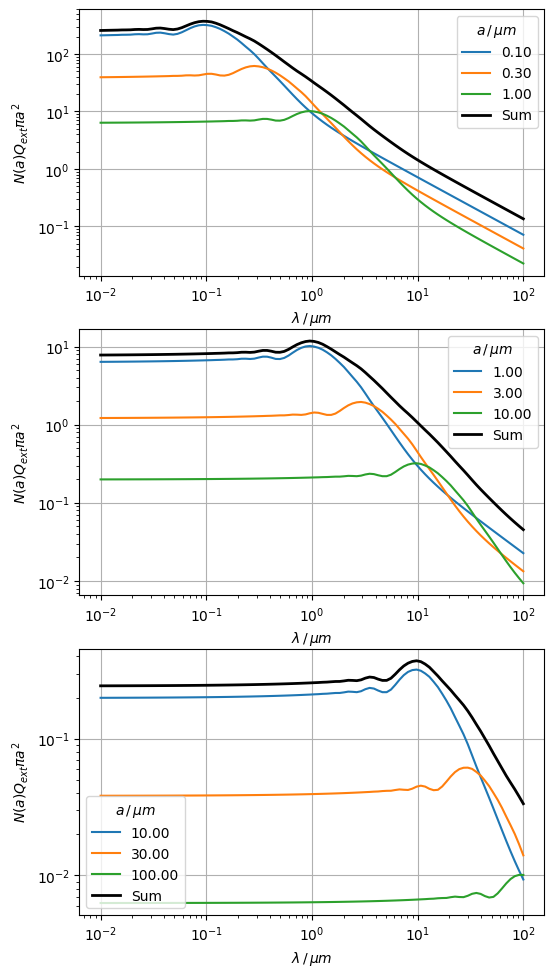

In [43]:
a = [[0.1, 0.3, 1],
     [1, 3, 10],
     [10, 30, 100]]       # grain sizes [μm]
b = 1.0                   # power law scaling factor
N = lambda a: b*a**(-3.5) # ISM grain size distribution
lambdas = np.logspace(-2, 2, 100)
fig, axs = plt.subplots(3, 1, figsize=(6, 12), dpi=100)

for i,ax in enumerate(axs):
    Sum = np.zeros(lambdas.size)
    for a1 in a[i]:
        x = 2*np.pi*a1/(lambdas)
        qext = mp.mie(m, x)[0]
        sigma_ext = N(a1)*qext*np.pi*a1**2 # extinction cross section
        Sum += sigma_ext
        ax.loglog(lambdas, sigma_ext, label='{:2.2f}'.format(a1))
    ax.loglog(lambdas, Sum, 'k', lw=2, label='Sum')
    ax.set(xlabel=r'$\lambda\,/\,\mu m$', ylabel=r'$N(a)Q_{ext}\pi a^2$')
    ax.legend(title='$a\,/\,\mu m$')
    ax.grid()
    
plt.savefig('Q4.3c.pdf', bbox_inches='tight')